# 각 시군구별 실제 투표율과 가장 유사한 지역 Top 5를 뽑아서 오차의 합을 막대 그래프로 그려라   
## 조건1 : 각 후보별 순위 변동 없음,   
## 조건 2 : 각 후보별 오차 1프로 이내,   
## 조건 3 : 오차의 합이 최소인 지역 순서대로 정렬   
## 실제 득표율 : 이재명 47.83, 윤석열 48.56, 심상정 2.37

In [1]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv", stringsAsFactors = F)
head(election)
library(dplyr) #aggregate,arrange
#library(plotrix) #pie3D

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
vote.전체투표율 <- c(47.83, 48.56,2.37 )

In [3]:
vote.전체투표율

[1] 47.83 48.56  2.37

In [4]:
vote.투표율 <- election[,5:7]/ election[,4] * 100
vote.투표율  <- cbind(시군구=election$시군구, vote.투표율 )

In [5]:
vote.투표율

시군구,이재명,윤석열,심상정
종로구,45.84166,48.86464,3.095529
중구,44.99400,50.47883,2.717711
용산구,39.49746,55.92695,2.876345
성동구,42.79609,52.66680,2.720037
광진구,46.68176,48.30022,3.003342
동대문구,46.60414,48.63726,2.764254
중랑구,49.98083,45.31170,2.644693
성북구,48.83927,46.21835,3.063791
강북구,51.80949,43.38976,2.629758
도봉구,49.31863,46.18675,2.594475


In [6]:
vote.투표율  <- vote.투표율 [((abs(vote.투표율 [,2]- vote.전체투표율[1]) < 1) 
                & (abs(vote.투표율 [,3]-vote.전체투표율[2]) < 1) 
                & (abs(vote.투표율 [,4]-vote.전체투표율[3]) < 1) 
                & (vote.투표율 [,2] < vote.투표율 [,3])),] # 윤석열이 큰조건 이재명보다

In [7]:
vote.투표율

,시군구,이재명,윤석열,심상정
51,동구,46.91089,48.04976,2.922919
52,미추홀구,47.08443,47.80874,2.743668
68,유성구,47.05121,48.19437,2.810061
69,대덕구,46.89525,47.79644,2.721743
137,청주시흥덕구,47.00549,47.62376,2.914169


In [8]:
vote.투표율$투표율오차 <- (abs(vote.투표율[,2] - vote.전체투표율[1]) + abs(vote.투표율 [,3] - vote.전체투표율[2]) + abs(vote.투표율 [,4] - vote.전체투표율[3]))
vote.투표율  <- arrange(vote.투표율 ,투표율오차) #절대값을 각각씌어서 투표율 오차를 만들었음

In [9]:
vote.투표율

시군구,이재명,윤석열,심상정,투표율오차
유성구,47.05121,48.19437,2.810061,1.584484
미추홀구,47.08443,47.80874,2.743668,1.870498
동구,46.91089,48.04976,2.922919,1.982266
대덕구,46.89525,47.79644,2.721743,2.050051
청주시흥덕구,47.00549,47.62376,2.914169,2.304917


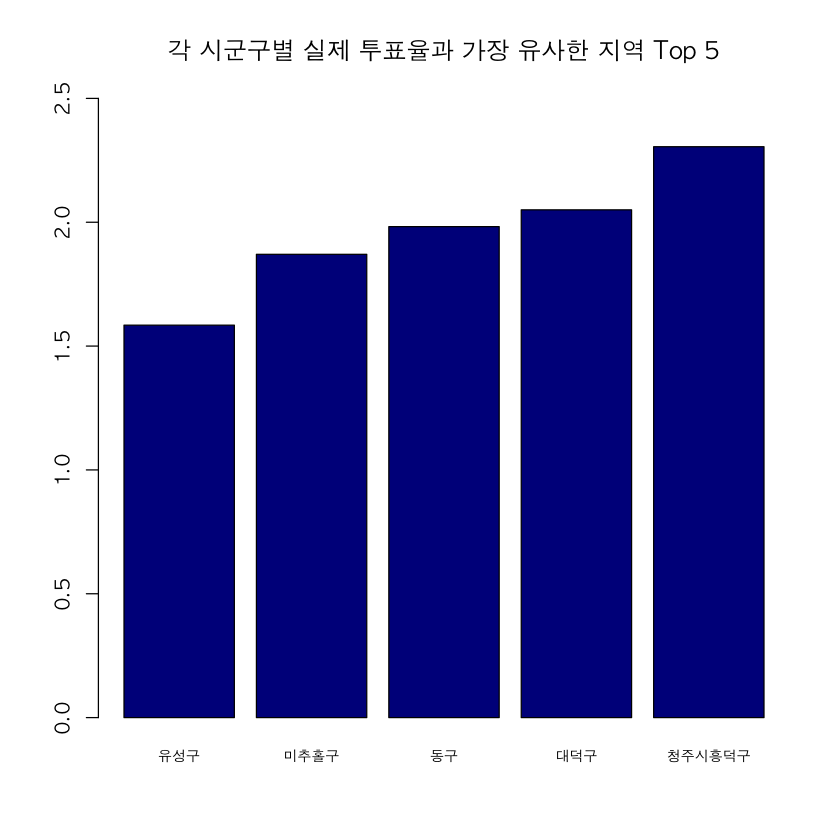

In [10]:
par(family = "AppleGothic")
options(warn = -1)
barplot(vote.투표율$투표율오차,
        main = "각 시군구별 실제 투표율과 가장 유사한 지역 Top 5",
        ylim = c(0,2.5),
        col = "darkblue",
        names = vote.투표율$시군구,
        cex.names = 0.7
       )